In [86]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline


In [91]:
q1_2018 = pd.read_csv('clean_data/clean_2018Q1.csv')
q2_2018 = pd.read_csv('clean_data/clean_2018Q2.csv')
q3_2018 = pd.read_csv('clean_data/clean_2018Q3.csv')
q4_2018 = pd.read_csv('clean_data/clean_2018Q4.csv')

In [90]:
q1_2018.head()

,funded_amnt,int_rate,installment,annual_inc,pymnt_plan,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,...,title_car_financing,title_credit_card_refinancing,title_debt_consolidation,title_green_loan,title_home_buying,title_home_improvement,title_major_purchase,title_medical_expenses,title_moving_and_relocation,title_vacation
0,35000.0,13.58,806.79,160000.0,0.0,7.87,0.0,705.0,709.0,1.0,...,0,0,0,0,0,1,0,0,0,0
1,7000.0,11.98,232.44,40000.0,0.0,20.25,0.0,695.0,699.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,20000.0,9.92,424.16,69000.0,0.0,21.95,0.0,710.0,714.0,1.0,...,0,0,1,0,0,0,0,0,0,0
3,7000.0,20.39,261.54,41000.0,0.0,30.15,0.0,680.0,684.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,13400.0,16.01,325.94,94000.0,0.0,14.26,0.0,740.0,744.0,1.0,...,0,0,1,0,0,0,0,0,0,0


In [92]:
ls_df = [q1_2018,q2_2018,q3_2018,q4_2018]

In [93]:
for df in ls_df: 
    print(df.shape)

(98434, 107)
(120298, 107)
(117720, 107)
(116434, 107)


In [100]:
for i in range(len(q1_2018.columns)):
    if list(q1_2018.columns)[i] != list(q4_2018.columns)[i]:
        print(list(q1_2018.columns)[i], list(q4_2018.columns)[i])

In [102]:
df = pd.concat(ls_df, ignore_index=True)

In [103]:
df.head()

,funded_amnt,int_rate,installment,annual_inc,pymnt_plan,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,...,title_car_financing,title_credit_card_refinancing,title_debt_consolidation,title_green_loan,title_home_buying,title_home_improvement,title_major_purchase,title_medical_expenses,title_moving_and_relocation,title_vacation
0,35000.0,13.58,806.79,160000.0,0.0,7.87,0.0,705.0,709.0,1.0,...,0,0,0,0,0,1,0,0,0,0
1,7000.0,11.98,232.44,40000.0,0.0,20.25,0.0,695.0,699.0,0.0,...,0,0,0,0,0,1,0,0,0,0
2,20000.0,9.92,424.16,69000.0,0.0,21.95,0.0,710.0,714.0,1.0,...,0,0,1,0,0,0,0,0,0,0
3,7000.0,20.39,261.54,41000.0,0.0,30.15,0.0,680.0,684.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,13400.0,16.01,325.94,94000.0,0.0,14.26,0.0,740.0,744.0,1.0,...,0,0,1,0,0,0,0,0,0,0


In [105]:
df['year'] = 2018

In [107]:
df.shape

(452886, 108)

In [131]:
list(df.columns);

In [113]:
df['fico_avg'] = (df['fico_range_low'] + df['fico_range_high']) / 2

In [114]:
df.drop(columns=['fico_range_low','fico_range_high'], inplace=True)

In [163]:
df.to_csv(path_or_buf='year/year_2018.csv', index = False)

In [ ]:
default = df.loc[df['status_default']==1]
charged_off = df.loc[df['status_charged_off']==1]
fully_paid = df.loc[df['status_fully_paid']==1]
in_grace_period = df.loc[df['status_in_grace_period']==1]
late_16_30_days = df.loc[df['status_late__16_30_days_']==1]
late_31_120_days = df.loc[df['status_late__31_120_days_']==1]

In [120]:
default.shape

(15, 107)

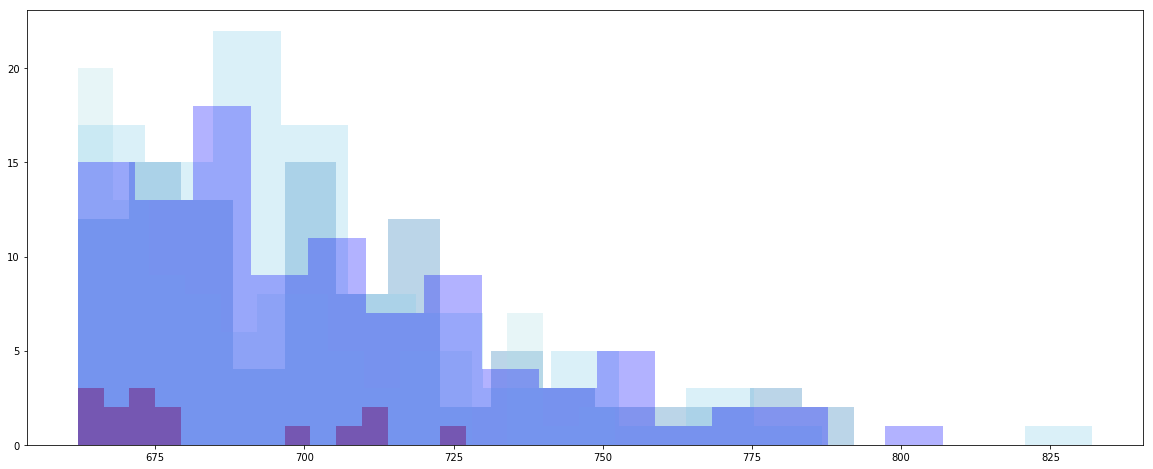

In [161]:
plt.figure(figsize=(20,8))
plt.hist(default['fico_avg'], bins=15, color='red')
plt.hist(charged_off['fico_avg'][:100], bins=15, alpha=0.3)
# plt.hist(fully_paid['fico_avg'][:15], bins=15, alpha=0.3, color='cyan')
plt.hist(in_grace_period['fico_avg'][:100], bins=15, alpha=0.3, color='powderblue')
plt.hist(late_16_30_days['fico_avg'][:100], bins=15, alpha=0.3, color='skyblue')
plt.hist(late_31_120_days['fico_avg'][:100], bins=15, alpha=0.3, color='blue');

In [142]:
np.mean(default['fico_avg'])

np.mean()

683.0

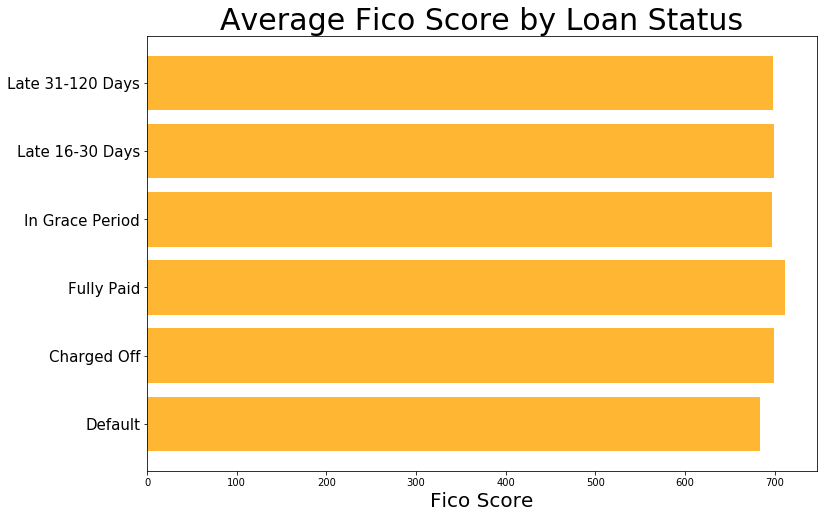

In [151]:
np.mean(default['fico_avg'])
np.mean(charged_off['fico_avg'])
np.mean(fully_paid['fico_avg'])
np.mean(in_grace_period['fico_avg'])
np.mean(late_16_30_days['fico_avg'])
np.mean(late_31_120_days['fico_avg'])


objects = ('Default', 'Charged Off', 'Fully Paid', 'In Grace Period', 'Late 16-30 Days', 'Late 31-120 Days')
y_pos = np.arange(len(objects))
performance = [np.mean(default['fico_avg']),
               np.mean(charged_off['fico_avg']),
np.mean(fully_paid['fico_avg']),
np.mean(in_grace_period['fico_avg']),
np.mean(late_16_30_days['fico_avg']),
np.mean(late_31_120_days['fico_avg'])]


plt.figure(figsize=(12,8))
plt.barh(y_pos, performance, align='center', color='orange', alpha=0.8)
plt.yticks(y_pos, objects, fontsize=15)
plt.xlabel('Fico Score', fontsize=20)
plt.title('Average Fico Score by Loan Status', fontsize=30)

plt.show()

In [152]:
from imblearn.over_sampling import SMOTE
import smote
import rus

0          7.87
1         20.25
2         21.95
3         30.15
4         14.26
          ...  
452881    16.85
452882    20.95
452883    13.16
452884    11.30
452885    17.72
Name: dti, Length: 452886, dtype: float64